# [Quantum Phase Estimation Code used from IBM's Qiskit Tutorials](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

Code modified from source

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [3]:
def generalised_qpe(amt_estimation_qubits, angle):
    # Create and set up circuit
    qpe3 = QuantumCircuit(amt_estimation_qubits+1, amt_estimation_qubits)

    # Apply H-Gates to counting qubits:
    for qubit in range(amt_estimation_qubits):
        qpe3.h(qubit)

    # Prepare our eigenstate |psi>:
    qpe3.x(amt_estimation_qubits)

    repetitions = 1
    for counting_qubit in range(amt_estimation_qubits):
        for i in range(repetitions):
            qpe3.cp(angle, counting_qubit, amt_estimation_qubits);
        repetitions *= 2

    # Do the inverse QFT:
    qft_dagger(qpe3, amt_estimation_qubits)

    # Measure of course!
    qpe3.barrier()
    for n in range(amt_estimation_qubits):
        qpe3.measure(n,n)

    #print(qpe3)
    # Let's see the results!
    aer_sim = Aer.get_backend('aer_simulator')
    shots = 4096
    t_qpe3 = transpile(qpe3, aer_sim)
    qobj = assemble(t_qpe3, shots=shots)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()
    print(answer)
    print("Most frequent '" + answer.most_frequent() + "'")
    print("Approx rotation angle by Z from the unitary'" + str(int(answer.most_frequent(), 2)/2**amt_estimation_qubits) + "'")
    print("Phase Calculation " + answer.most_frequent())

    ##return(plot_histogram(answer))
    ##comment out the return if you want to see the histogram
    return((int(answer.most_frequent(), 2)/2**amt_estimation_qubits))
    
    
generalised_qpe(8,(2*math.pi*1/10))
#generalised_qpe(2,(2*math.pi/4))

{'00010001': 7, '00011001': 974, '00011010': 2377, '10001000': 1, '00011100': 64, '11111010': 1, '00011101': 41, '00010111': 54, '00011000': 164, '01100111': 1, '00011011': 199, '00101001': 1, '11110011': 2, '00010110': 39, '00000101': 1, '00101110': 2, '00011110': 15, '00110110': 1, '00101010': 2, '00100000': 13, '11100010': 1, '00110000': 3, '00000111': 1, '00001111': 1, '00100110': 5, '00100101': 1, '01001100': 1, '00001110': 4, '00100010': 6, '00001011': 3, '11111100': 1, '00011111': 14, '11110101': 1, '00010000': 4, '00010101': 13, '00010011': 9, '00001101': 2, '11101010': 1, '00100100': 8, '00110011': 2, '00001010': 2, '00100001': 4, '01011000': 1, '00010100': 18, '00100011': 3, '00001100': 2, '00001001': 1, '00110101': 1, '00000010': 2, '00100111': 2, '01010110': 1, '00010010': 2, '10000100': 1, '01111110': 1, '11100011': 1, '11111001': 1, '00101100': 2, '00000011': 2, '01000101': 2, '00101000': 1, '01010001': 2, '11101000': 1, '00000000': 2, '01101001': 1}
Most frequent '000110

C:\Users\Gabriel\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


0.1015625

# An extra method to visualise the rotation angle, can use to check the algorithm

 You will notice on the very bottom cell, if you reduce the amount of qubits to use when estimating the phase that the results will become less accurate (top cell is the exact phase, bottom cell is the estimated phase) 

In [4]:
def visualise_rotation_angle(angle):
    sim = Aer.get_backend('aer_simulator') 
    q = QuantumRegister(1,'q')
    c = ClassicalRegister(1,'c')
    qc = QuantumCircuit(q,c)

    qc.h(0)
    qc.p(angle, 0);
    qc.h(0)

    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    return(plot_bloch_multivector(statevector))

C:\Users\Gabriel\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


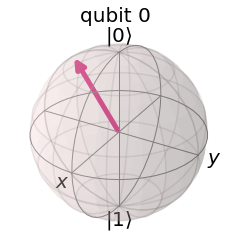

In [5]:
visualise_rotation_angle((2*math.pi*1/10))

C:\Users\Gabriel\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
C:\Users\Gabriel\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


{'000': 280, '001': 3551, '010': 98, '111': 42, '101': 31, '011': 40, '100': 26, '110': 28}
Most frequent '001'
Approx rotation angle by Z from the unitary'0.125'
Phase Calculation 001


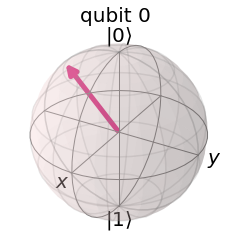

In [6]:
visualise_rotation_angle(2*math.pi*(generalised_qpe(3,(2*math.pi/10))))

In [7]:
# Create and set up circuit
amt_estimation_qubits = 5
qpe3 = QuantumCircuit(amt_estimation_qubits+1, amt_estimation_qubits)

# Apply H-Gates to counting qubits:
for qubit in range(amt_estimation_qubits):
    qpe3.h(qubit)

    # Prepare our eigenstate |psi>:
qpe3.x(amt_estimation_qubits)

    #repetitions = 1
    #for counting_qubit in range(amt_estimation_qubits):
    #    for i in range(repetitions):
    #        qpe3.cp(angle, counting_qubit, amt_estimation_qubits);
    #    repetitions *= 2

    # Do the inverse QFT:
qft_dagger(qpe3, amt_estimation_qubits)

    # Measure of course!
qpe3.barrier()
for n in range(amt_estimation_qubits):
    qpe3.measure(n,n)

    #print(qpe3)
    # Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print(answer)
print("Most frequent '" + answer.most_frequent() + "'")
print("Approx rotation angle by Z from the unitary'" + str(int(answer.most_frequent(), 2)/2**amt_estimation_qubits) + "'")
print("Phase Calculation " + answer.most_frequent())

{'00000': 4096}
Most frequent '00000'
Approx rotation angle by Z from the unitary'0.0'
Phase Calculation 00000


C:\Users\Gabriel\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
